# Exploratory Data Analysis with Python

## Introducción a EDA

El conjunto de datos que vamos a utilizar a lo largo de la sesión se puede encontrar en - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importar las librerias requeridas

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings

#warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

#### Primera mirada al dataset!

Aquí, vamos a utilizar pandas para leer el archivo csv descargado. A continuación, realice una primera mirada al dataset, identificando el número de filas y columnas en el conjunto de datos.



In [546]:
# Importar el dataset
df_healthcare = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [547]:
df_healthcare.shape

(5110, 12)

In [548]:
# Identificar cantidad de filas y columnas
print("The dataset has {} rows and {} columns.".format(df_healthcare.shape[0], df_healthcare.shape[1]))

The dataset has 5110 rows and 12 columns.


In [549]:
# Revisar los primeros registros
df_healthcare.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [550]:
# Ultimas filas
df_healthcare.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [551]:
# Ver el dataset completo
df_healthcare

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [552]:
# Trasponerlo
df_healthcare.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
id,9046,51676,31112,60182,1665,56669,53882,10434,27419,60491,...,68398,36901,45010,22127,14180,18234,44873,19723,37544,44679
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female,...,Male,Female,Female,Female,Female,Female,Female,Female,Male,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
hypertension,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private,...,Self-employed,Private,Private,Private,children,Private,Self-employed,Self-employed,Private,Govt_job
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban,...,Rural,Urban,Rural,Urban,Rural,Urban,Urban,Rural,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2


----

#### Información de los Atributos

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Analizando el dataset

#### Identificar el número de columnas, si hay valores perdidos y también el tipo de características / variables que se encuentran en el conjunto de datos.

In [553]:
df_healthcare.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [554]:
print("Hay " + str(df_healthcare.shape[1]) + " columnas")

Hay 12 columnas


In [555]:
df_healthcare.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [556]:
df_healthcare.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Filtre el dataset considerando por un lado a los datos tipo objeto y por el otro los numericos

In [557]:
df_healthcare_numericos = df_healthcare.select_dtypes(include=['number'])
df_healthcare_objetos = df_healthcare.select_dtypes(include=['object'])

#### ¿Qué persona tiene el IMC máximo del conjunto de datos?

In [558]:
df_healthcare

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [559]:
df_healthcare[df_healthcare["bmi"] == df_healthcare["bmi"].max()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


#### Preguntas sobre la mirada inicial

 1. ¿Está correlacionado la variable gender con stroke? ¿Tienen más probabilidades de sufrirlo los hombres o las mujeres?

In [560]:
df_healthcare = df_healthcare[df_healthcare["gender"] != 'Other']
df_healthcare["genero"] = df_healthcare["gender"].apply(lambda x: 1 if x == "Male" else 0)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_73370/588680792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["genero"] = df_healthcare["gender"].apply(lambda x: 1 if x == "Male" else 0)


In [561]:
df_healthcare["genero"].corr(df_healthcare["stroke"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

0.009080600160079366

In [562]:
#gender_stroke = df_healthcare.groupby(["gender", "stroke"]).size().reset_index(name='count')
#gender_stroke ["porcentaje"] = gender_stroke.groupby('gender')['count'].transform(lambda x: 100 * x / x.sum())
#gender_stroke

##### No hay correlación entre la variable gender y stroke. Los hombres tienen más probabilidades de sufrirlo que las mujeres.

----

## Ejercicio

1. ¿Cuál es el valor de la décima observación de la característica edad desde la parte superior del conjunto de datos?

In [563]:
df_healthcare["age"].iloc[9]

78.0

2. ¿Cuál es el valor de la 7ª observación de la característica bmi desde el fondo del conjunto de datos?

In [564]:
df_healthcare["bmi"].iloc[-7]

46.9

3. ¿Cuál es el id number y el work_type de la persona con el nivel medio de glucosa más bajo del conjunto de datos?

In [565]:
df_healthcare[df_healthcare["avg_glucose_level"] == df_healthcare["avg_glucose_level"].min()][["id", "work_type"]]

,id,work_type
4886,60562,Private


4. Imprime un dataframe filtrado, basado en tres condiciones:

   a) Edad inferior a 30 años
   b) Tipo_residencia es Rural
   c) El sexo es femenino
   
   ¿Cuántas filas hay en el conjunto de datos filtrado?

In [566]:
df_filtrado = df_healthcare.query("age < 30 and Residence_type == 'Rural' and gender == 'Female'")

In [567]:
df_filtrado = df_healthcare[(df_healthcare["age"] < 30) & (df_healthcare["Residence_type"] == "Rural") & (df_healthcare["gender"] == "Female")]
df_filtrado


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,genero
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1,0
292,44338,Female,16.00,0,0,No,children,Rural,110.63,19.5,Unknown,0,0
294,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0,0
312,68249,Female,27.00,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0,0
328,29865,Female,21.00,0,0,No,Private,Rural,89.44,21.9,smokes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,62416,Female,26.00,0,0,Yes,Private,Rural,73.29,27.8,never smoked,0,0
5031,67465,Female,20.00,0,0,No,Private,Rural,117.59,17.1,never smoked,0,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0,0


In [568]:
print("Hay " + str(df_filtrado.shape[0]) + " filas")

Hay 430 filas


----

## Analisis Univariado de datos

Utilice una función que nos ayude a imprimir algunos estadísticos resumidos básicos como el recuento, la media, la desviación típica, el valor máximo, el valor mínimo y los percentiles 25, 50 y 75 de cada una de las variables. 

In [569]:
df_healthcare.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,genero
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738,0.413975
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340,0.492592
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000,1.000000


#### Variable Target - Stroke

Analice la distribución de la variable target y grafique en un grafico de sectores (torta)

In [570]:
# Observe si el dataset esta desbalanceado, contando las ocurrencias de cada valor de la variable
df_healthcare['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

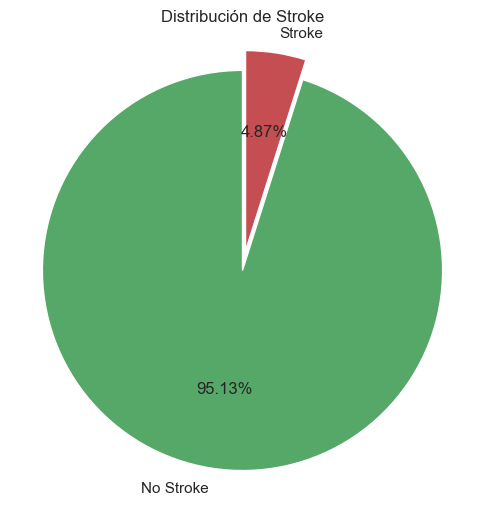

In [571]:
# stroke - pie chart
stroke_counts = df_healthcare['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
colors = ['g', 'r']
explode = (0, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=labels, colors=colors,
        startangle=90, explode=explode, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Distribución de Stroke')
plt.show()


#### Variables numéricas Continuas - age, avg_glucose_level, bmi

**Histograma**

Un histograma muestra datos numéricos agrupándolos en "intervalos" de igual anchura. Cada intervalo se representa como una barra cuya altura corresponde al número de puntos de datos que contiene.

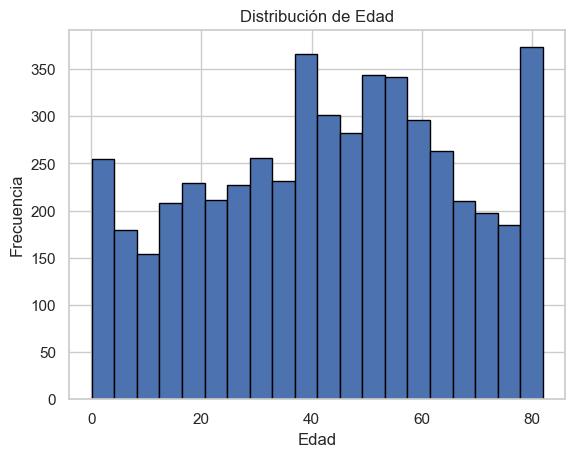

In [572]:
# Gráfico simple - age
plt.hist(df_healthcare['age'], bins=20, edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

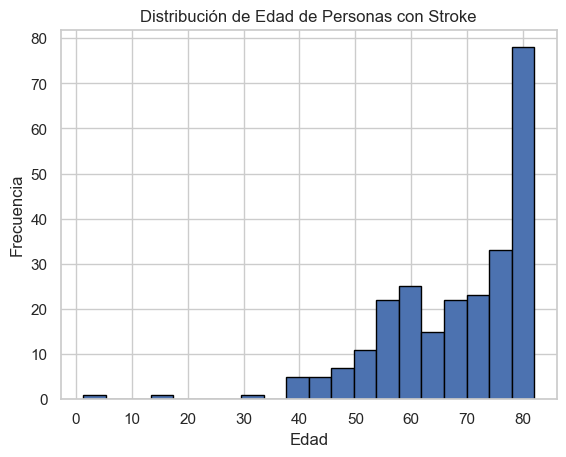

In [573]:
# Histograma de "age" en gente con "stroke"
df_people_with_stroke = df_healthcare[df_healthcare['stroke'] == 1]
plt.hist(df_people_with_stroke['age'], bins=20, edgecolor='black')
plt.title('Distribución de Edad de Personas con Stroke')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

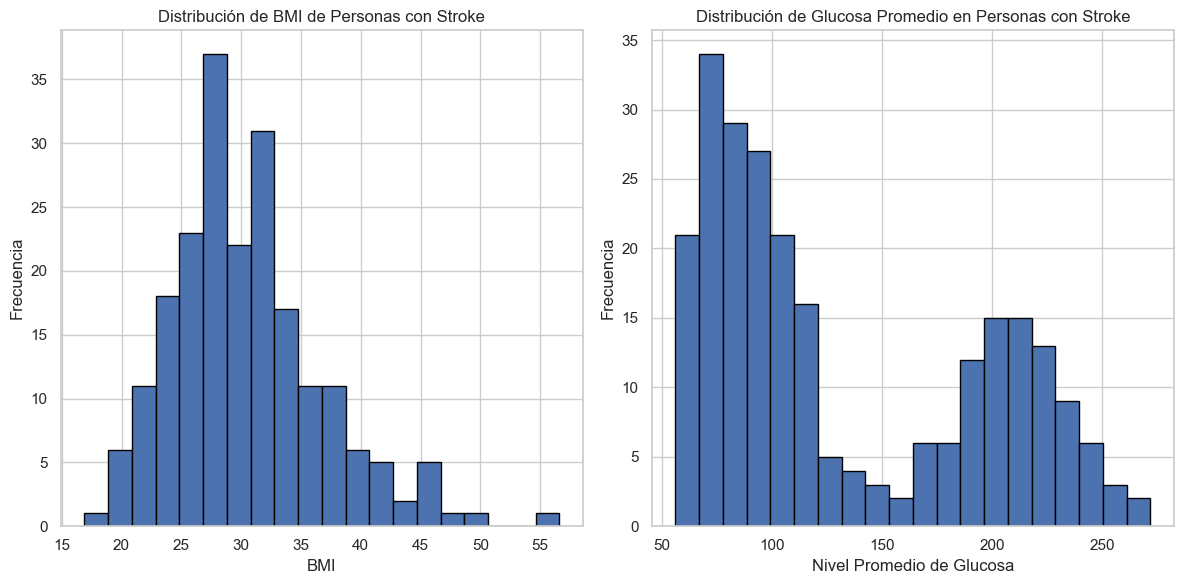

In [574]:
# subplots - bmi, avg_glucose_level
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(df_people_with_stroke['bmi'], bins=20, edgecolor='black')
axs[0].set_title('Distribución de BMI de Personas con Stroke')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(df_people_with_stroke['avg_glucose_level'], bins=20, edgecolor='black')
axs[1].set_title('Distribución de Glucosa Promedio en Personas con Stroke')
axs[1].set_xlabel('Nivel Promedio de Glucosa')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### Boxplots and Outliers

Un diagrama de caja es una forma estandarizada de mostrar la distribución de los datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos y cuáles son. También puede indicarle si sus datos son simétricos, con qué precisión están agrupados y si están sesgados y de qué forma.

Represente en Diagramas de Cajas / Boxplot las variables númericas del punto anterior e interprete los resultados

#### ¿Debemos eliminar o mantener los valores atípicos?

In [575]:
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).shape[1]
    num_rows = (num_cols - 1) // 2 + 1
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        data = df[col].dropna()
        box = axs[i].boxplot(data, patch_artist=True, boxprops=dict(facecolor='#336fa2'), medianprops=dict(color='black'))
        for patch in box['fliers']:
            patch.set_markerfacecolor('black')
            patch.set_markeredgecolor('black')
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()


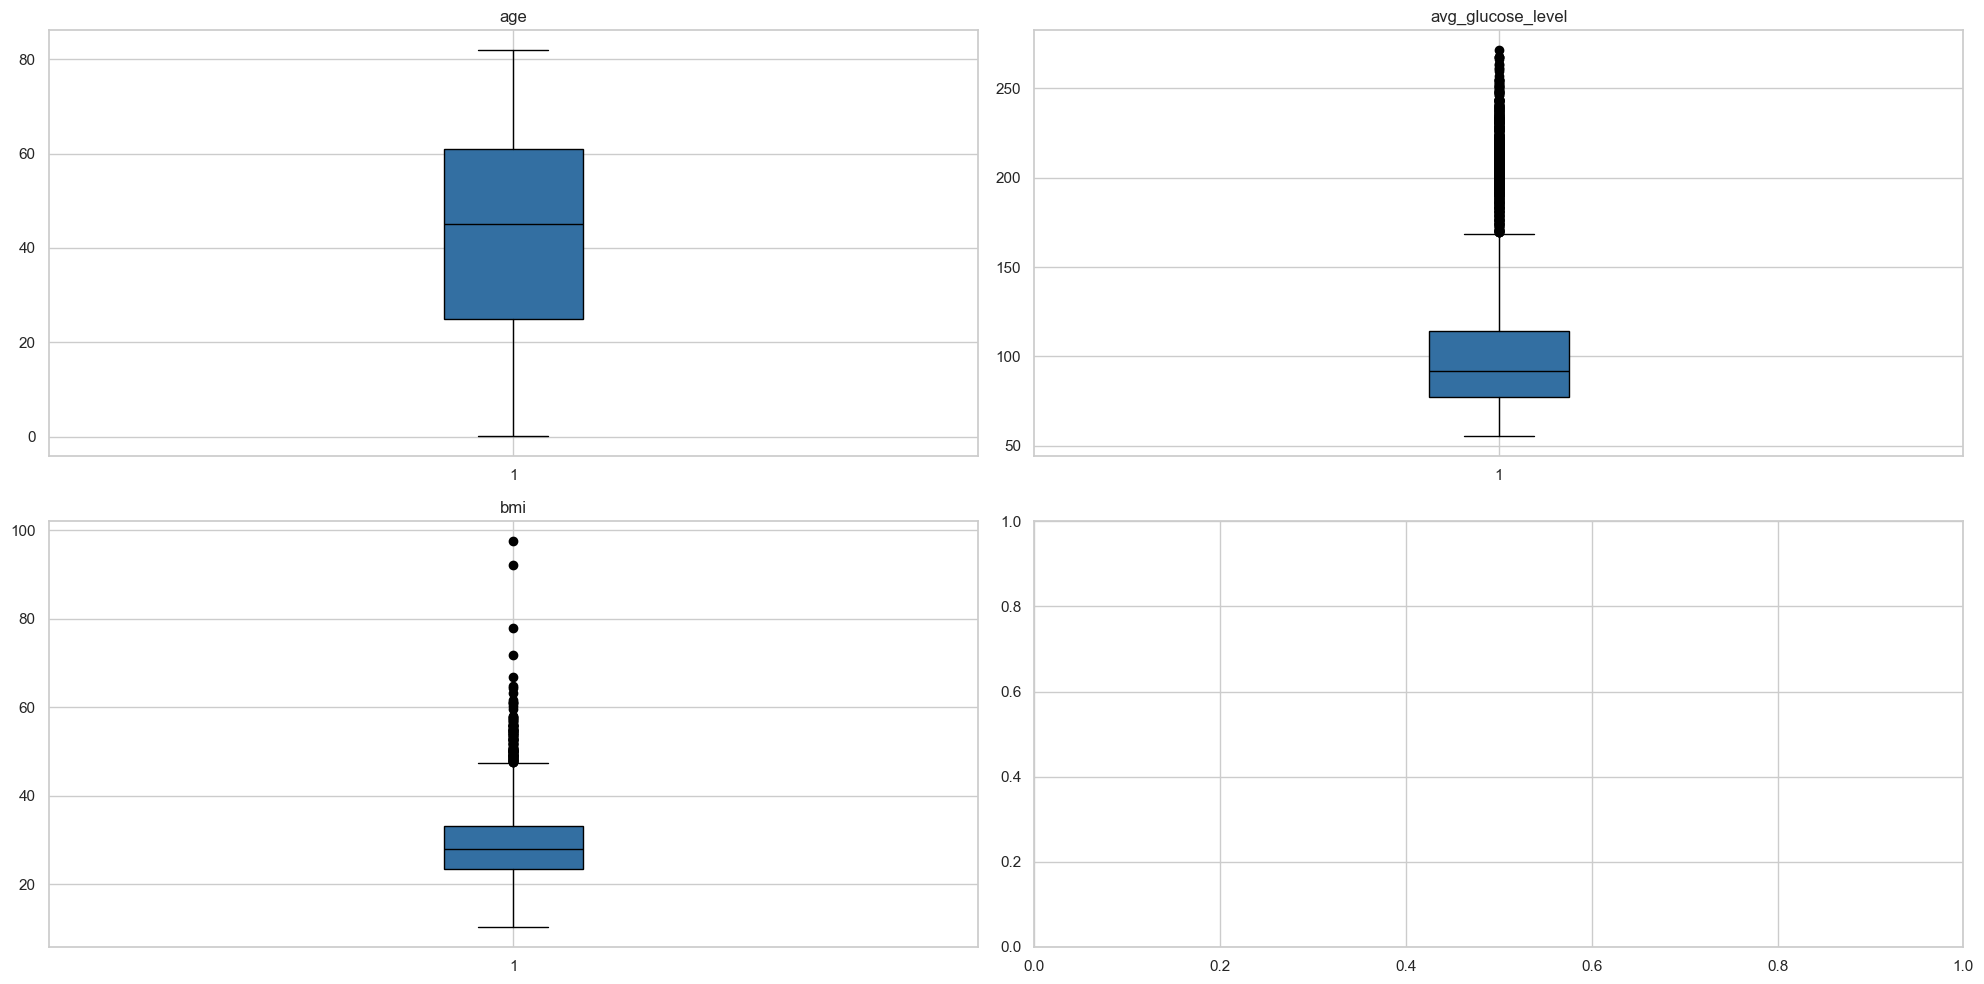

In [576]:
plot_outliers(df_healthcare[["age", "avg_glucose_level", "bmi"]])

##### Debemos mantener los valores outliers porque CASI TODOS los valores atípicos dentro de df_healthcare son las personas que tienen stroke (como podemos ver en el gráfico de abajo).

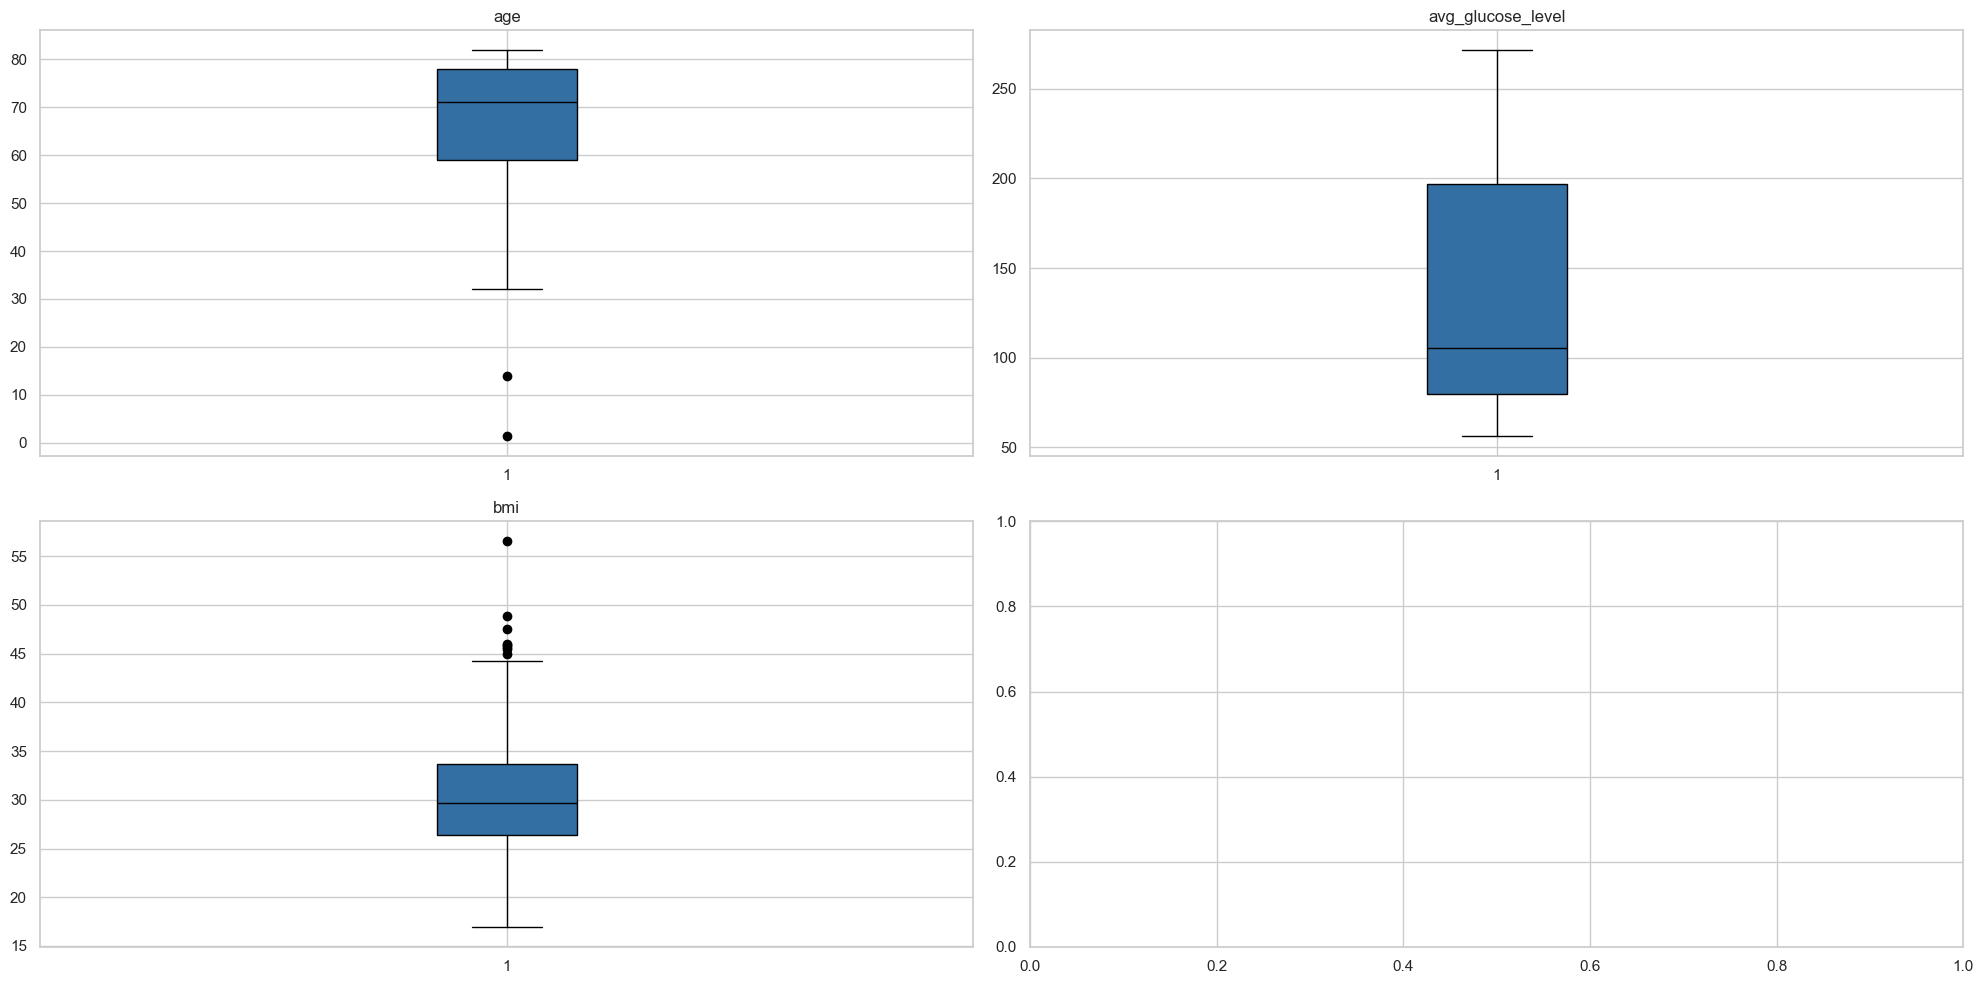

In [577]:
plot_outliers(df_people_with_stroke[["age", "avg_glucose_level", "bmi"]])

#### Variables Categoricas - gender, ever_married, work_type, residence_type, smoking_status

In [578]:
# Utilice la funcion describe para analizar las columnas no numericas
df_healthcare_objetos.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Diagrama de Barras

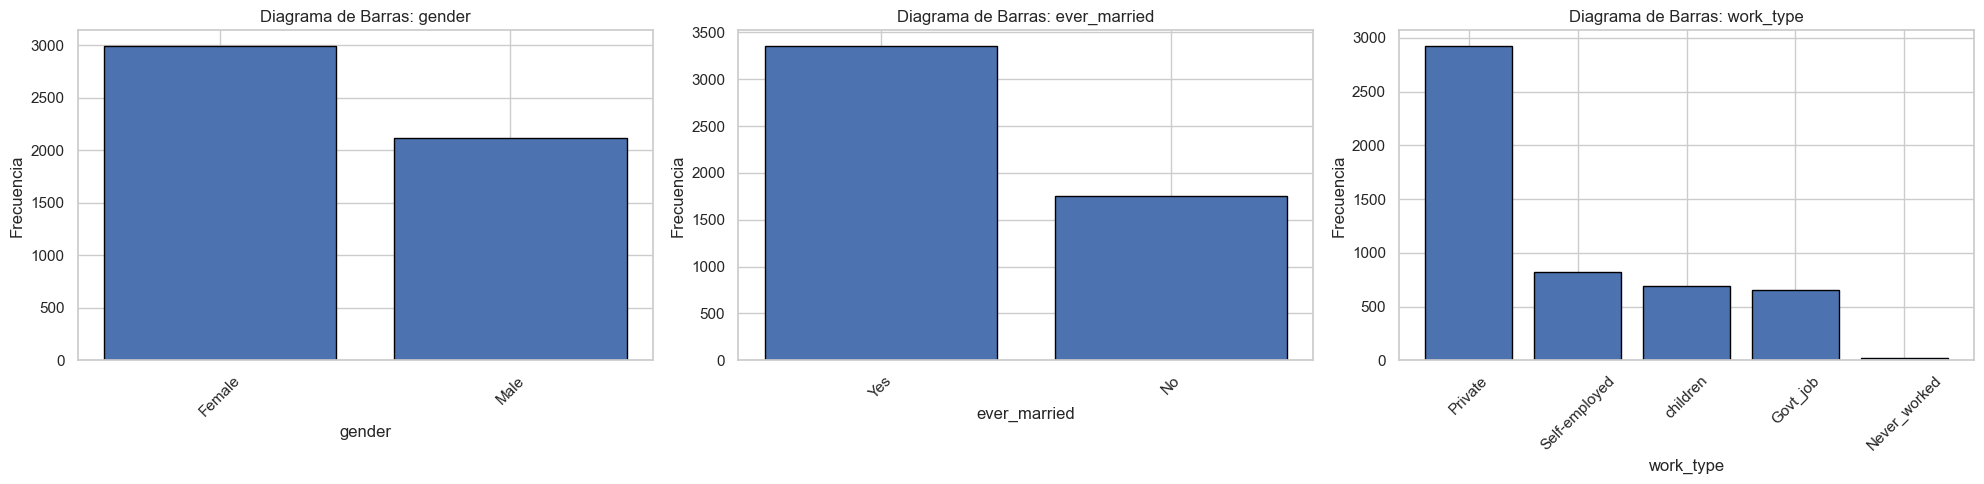

In [579]:
# Diagrama de Barras para gender, ever_married y work_type
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax, col in zip(axs, ['gender', 'ever_married', 'work_type']):
    counts = df_healthcare[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

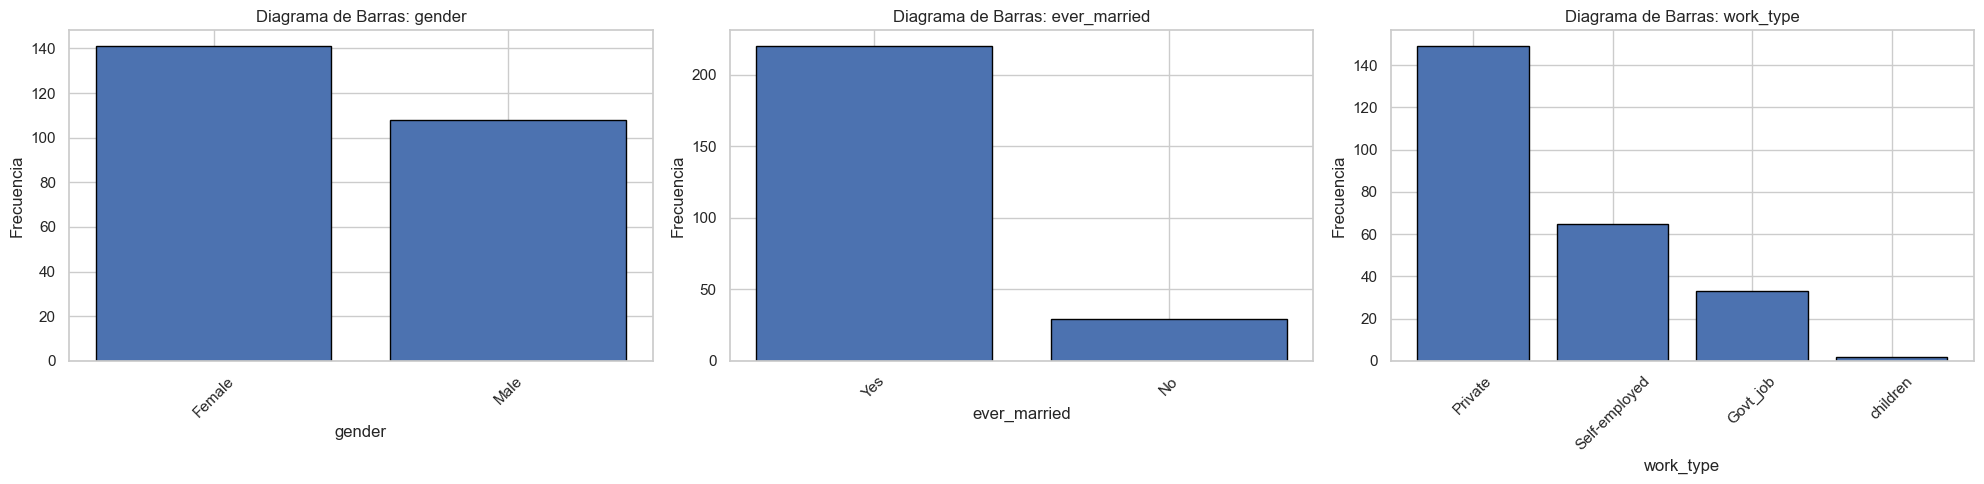

In [580]:
# Lo mismo que arriba para las personas que han sufrido la enfermedad
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax, col in zip(axs, ['gender', 'ever_married', 'work_type']):
    counts = df_people_with_stroke[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [581]:
df_healthcare

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,genero
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1


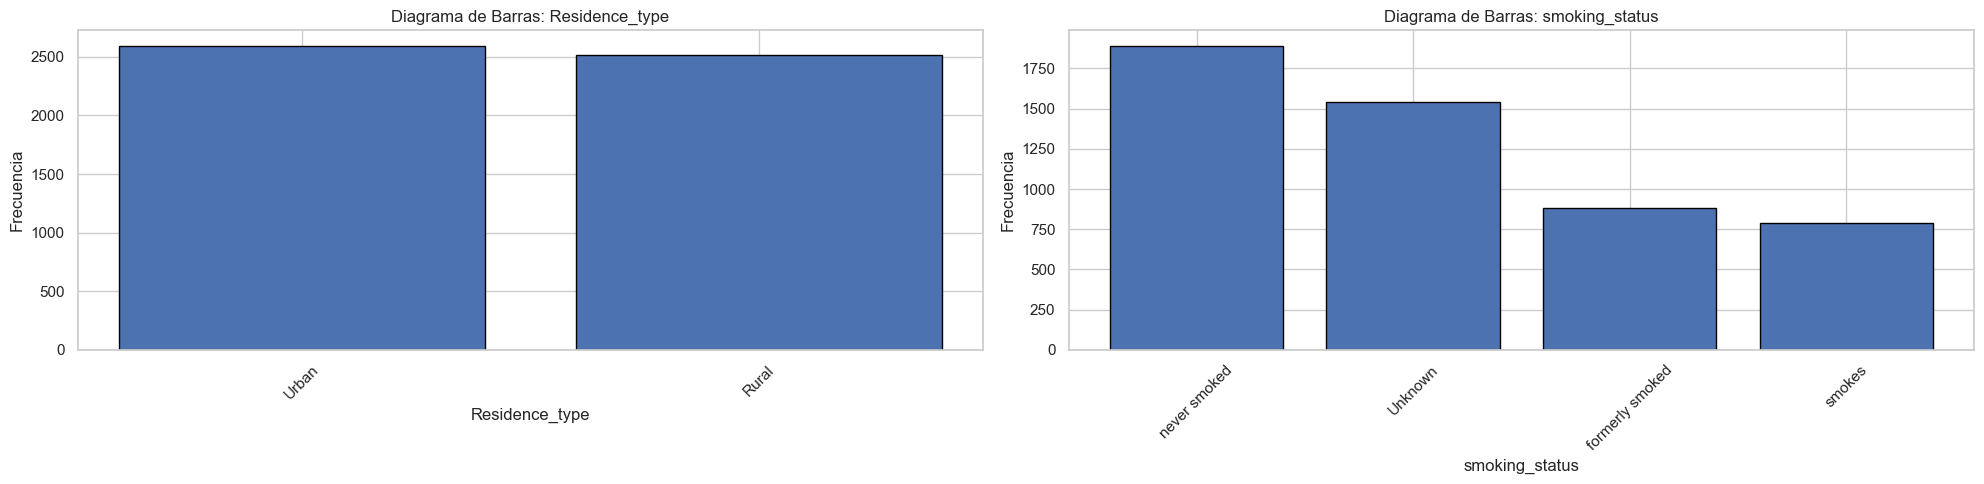

In [582]:
#  Diagrama de Barras para residence_type y smoking_status
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, col in zip(axs, ['Residence_type', 'smoking_status']):
    counts = df_healthcare[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


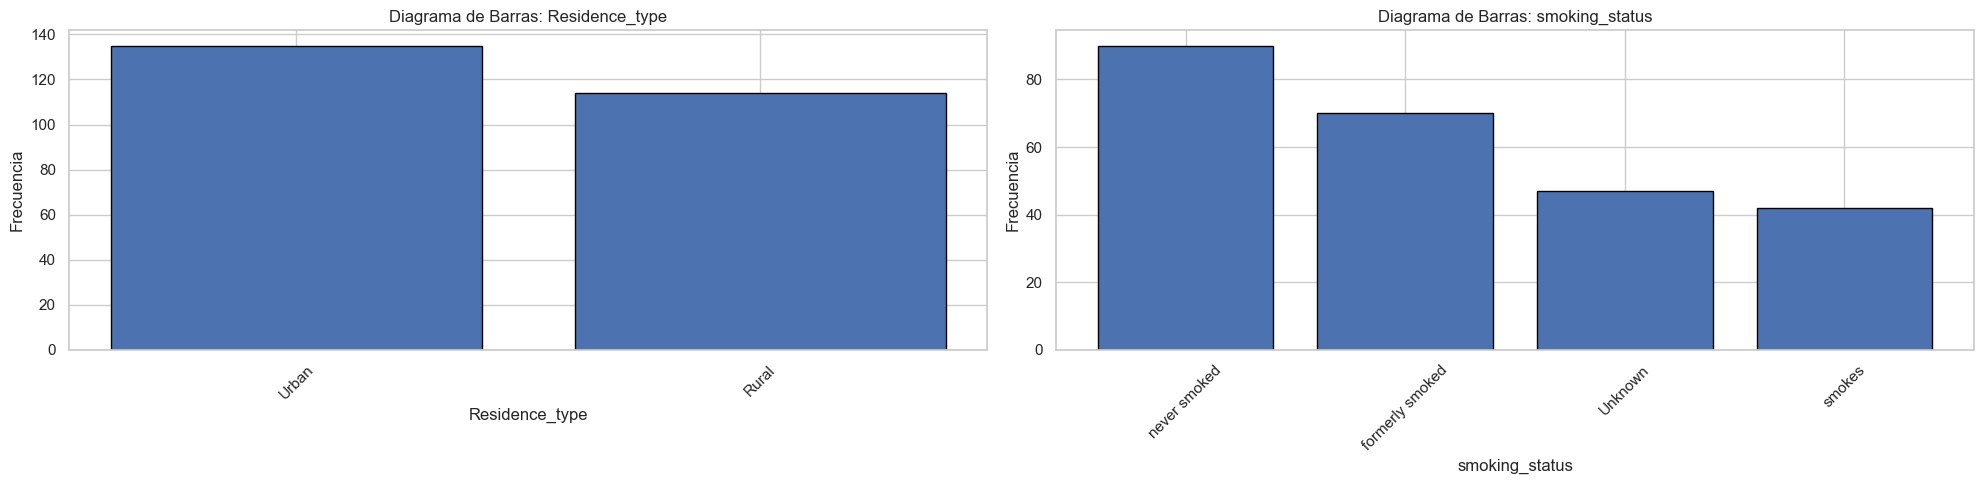

In [583]:
# Lo mismo que arriba pero para personas que sufrieron la enfermedad
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, col in zip(axs, ['Residence_type', 'smoking_status']):
    counts = df_people_with_stroke[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


----

## Analisis Bivariado

#### ¿Las personas mayores tienden a tener más accidentes cerebrovasculares? (Ayudese con un Diagrama de Cajas comparativo)

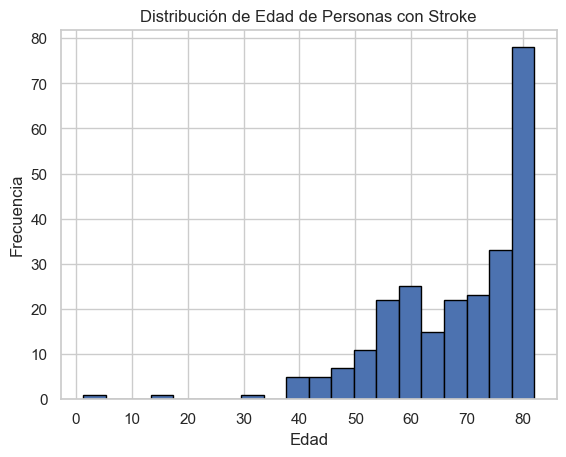

In [584]:
plt.hist(df_people_with_stroke['age'], bins=20, edgecolor='black')
plt.title('Distribución de Edad de Personas con Stroke')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

##### Sí. Las personas mayores tienden a tener más accidentes cerebrovasculares.

<Figure size 800x600 with 0 Axes>

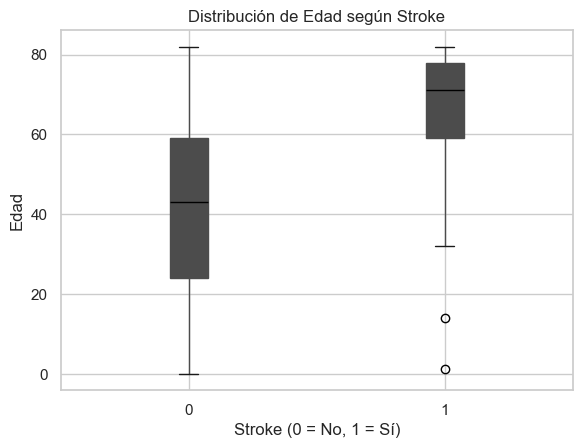

In [585]:
plt.figure(figsize=(8, 6))
df_healthcare.boxplot(column='age', by='stroke', patch_artist=True,
                      medianprops=dict(color='black'))
plt.title("Distribución de Edad según Stroke")
plt.suptitle('') 
plt.xlabel("Stroke (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()


#### Existe una conexión entre el tipo de trabajo que realiza y su índice de masa corporal? (Utilice violinplot)

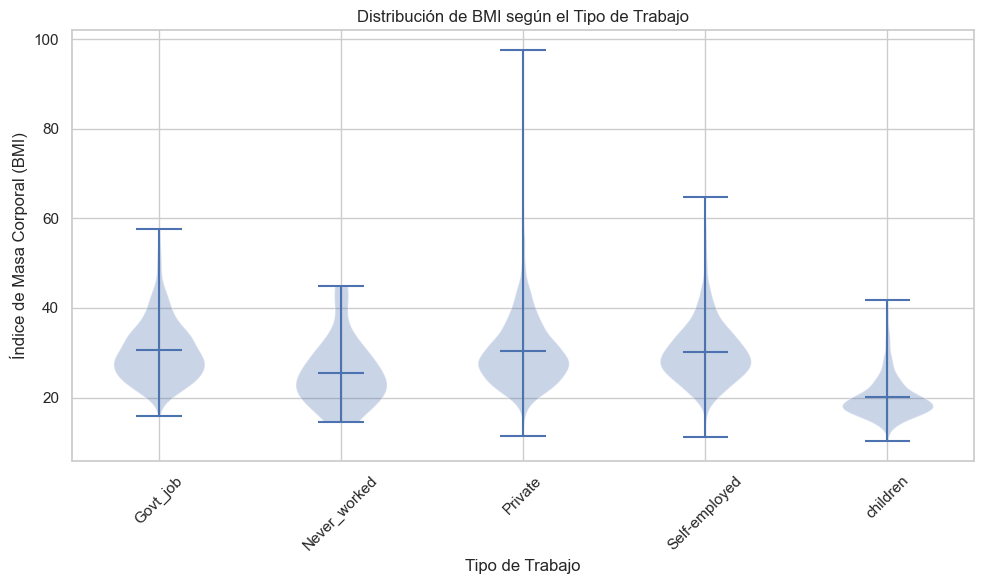

In [586]:
groups = df_healthcare.groupby('work_type')['bmi'].apply(lambda x: x.dropna().tolist())
data = groups.tolist()
categories = groups.index.tolist()

plt.figure(figsize=(10, 6))
vp = plt.violinplot(data, showmeans=True)

plt.xticks(range(1, len(categories)+1), categories, rotation=45)
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.title("Distribución de BMI según el Tipo de Trabajo")
plt.tight_layout()
plt.show()

- **A simple vista, no se observa una relación contundente** entre el tipo de trabajo y el índice de masa corporal, puesto que las medianas son similares y las distribuciones se superponen en buena medida.  

#### ¿Las personas mayores tienen un nivel de glucosa promedio más alto? (Ayudese utilizando un scatterplot)

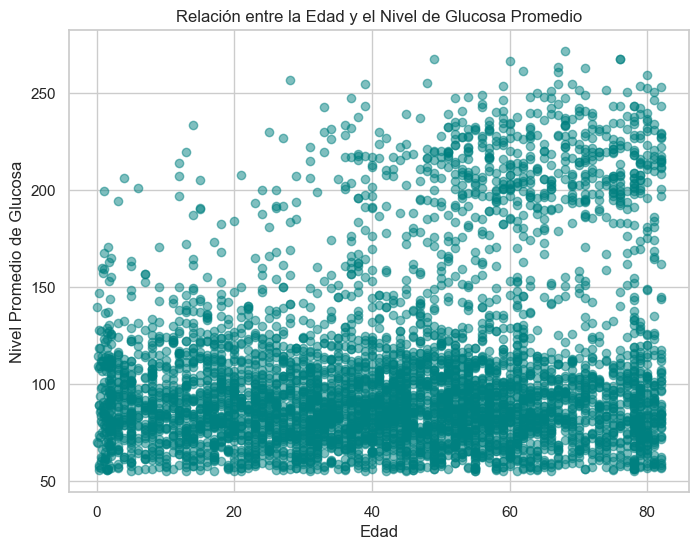

In [587]:
plt.figure(figsize=(8,6))
plt.scatter(df_healthcare['age'], df_healthcare['avg_glucose_level'], alpha=0.5, color='teal')
plt.xlabel('Edad')
plt.ylabel('Nivel Promedio de Glucosa')
plt.title('Relación entre la Edad y el Nivel de Glucosa Promedio')
plt.show()

##### Las personas mayores CLARAMENTE tienen un nivel de glucosa promedio más alto

#### Tabaquismo frente a accidente cerebrovascular y tipo de trabajo frente a hipertensión (realice la comparacion utilizando countplot)

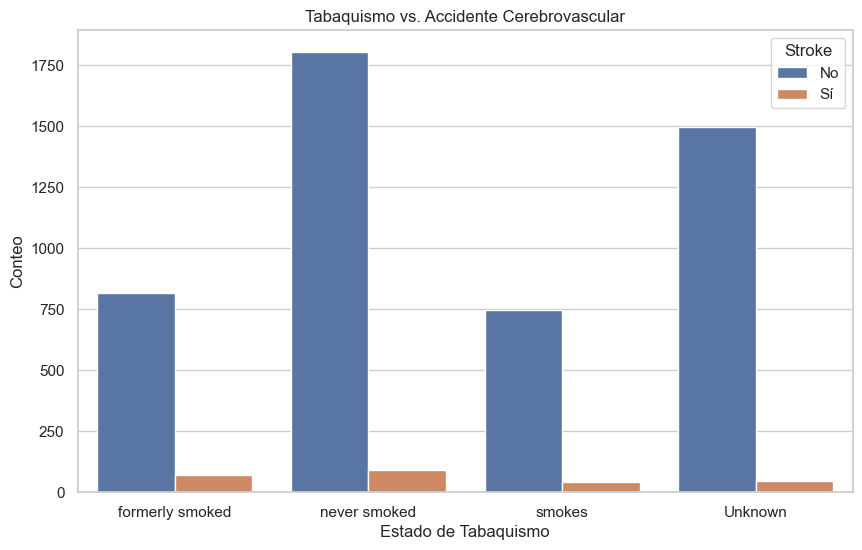

In [588]:
#1. Tabaquismo vs. Accidente Cerebrovascular

plt.figure(figsize=(10, 6))
sns.countplot(data=df_healthcare, x='smoking_status', hue='stroke')
plt.title('Tabaquismo vs. Accidente Cerebrovascular')
plt.xlabel('Estado de Tabaquismo')
plt.ylabel('Conteo')
plt.legend(title='Stroke', labels=['No', 'Sí'])
plt.show()

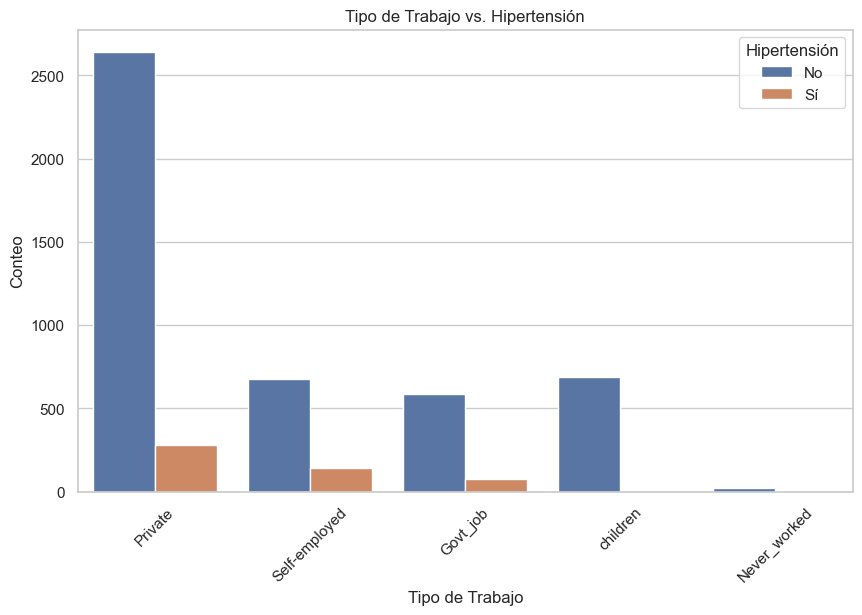

In [589]:
#2. Tipo de Trabajo vs. Hipertensión

plt.figure(figsize=(10, 6))
sns.countplot(data=df_healthcare, x='work_type', hue='hypertension')
plt.title('Tipo de Trabajo vs. Hipertensión')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Conteo')
plt.legend(title='Hipertensión', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()

----

## Ejercicio

   
Crea una figura de 3 subplots para responder las siguientes preguntas:
   
   a) ¿Cuál es el porcentaje de personas con hipertensión en el conjunto de datos?
   
   b) En los diferentes valores dentro de la característica ""smoking_status"", ¿los hombres superan en número a las mujeres en alguno de ellos?
   
   c) ¿Qué me puede decir sobre la relación entre el tipo de trabajo y la edad?
   
   Todas las figuras deben contener títulos.

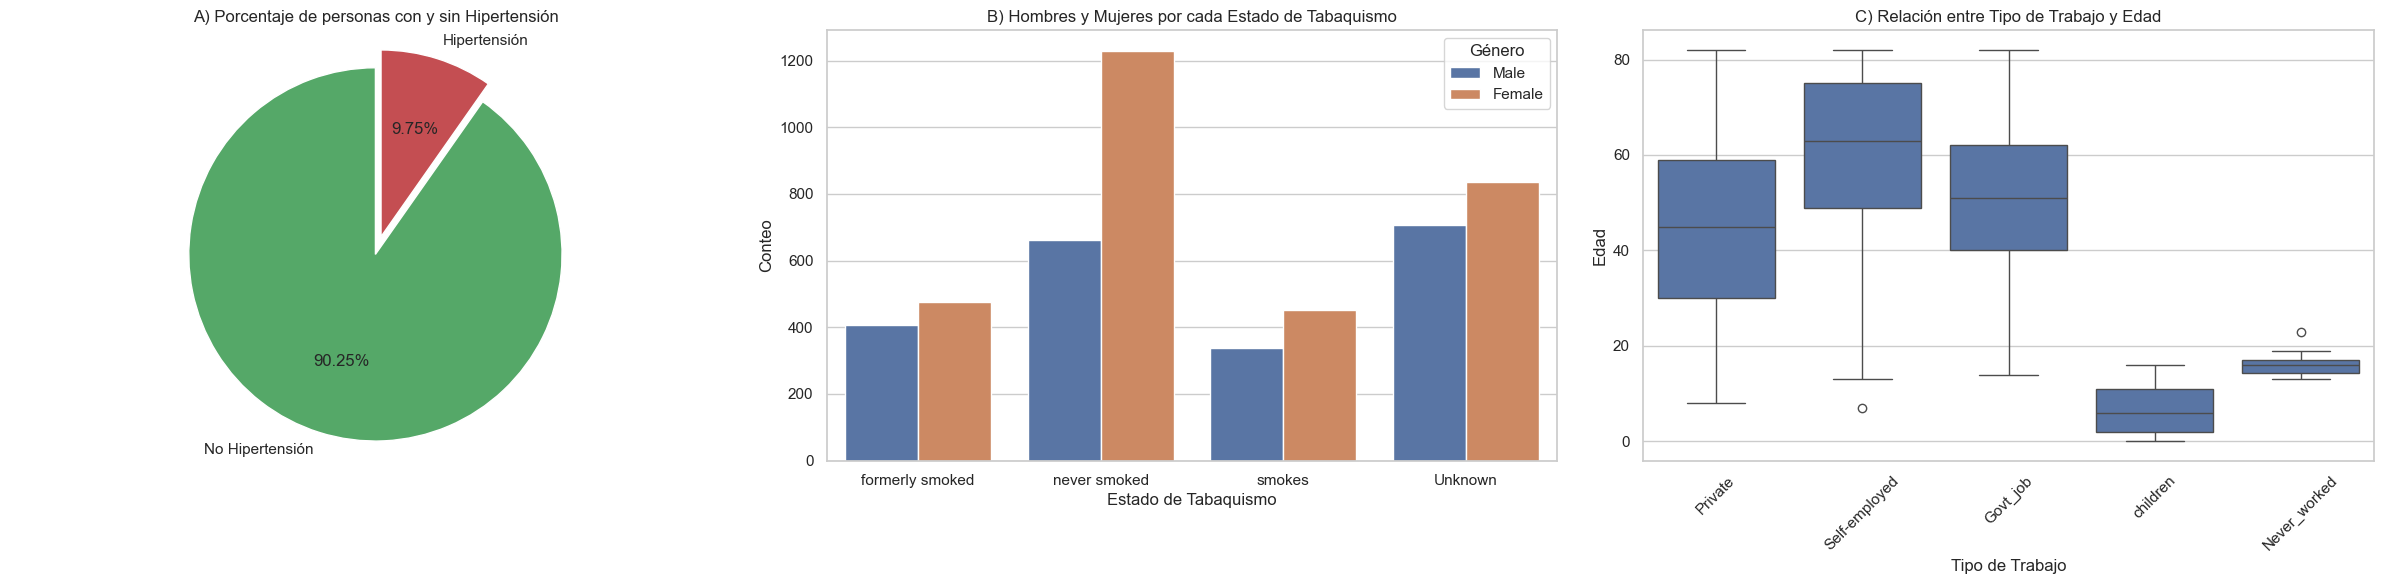

In [590]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# A) Pie chart: Porcentaje de personas con y sin Hipertensión
hypertension_counts = df_healthcare['hypertension'].value_counts()
labels = ['No Hipertensión', 'Hipertensión']
colors = ['g', 'r']
explode = (0, 0.1)
axs[0].pie(hypertension_counts, labels=labels, colors=colors,
           startangle=90, explode=explode, autopct='%1.2f%%')
axs[0].axis('equal')
axs[0].set_title('A) Porcentaje de personas con y sin Hipertensión')

# B) Countplot: Hombres y Mujeres por cada Estado de Tabaquismo
sns.countplot(data=df_healthcare, x='smoking_status', hue='gender', ax=axs[1])
axs[1].set_title('B) Hombres y Mujeres por cada Estado de Tabaquismo')
axs[1].set_xlabel('Estado de Tabaquismo')
axs[1].set_ylabel('Conteo')
axs[1].legend(title='Género')

# C) Boxplot: Relación entre Tipo de Trabajo y Edad
sns.boxplot(data=df_healthcare, x='work_type', y='age', ax=axs[2])
axs[2].set_title('C) Relación entre Tipo de Trabajo y Edad')
axs[2].set_xlabel('Tipo de Trabajo')
axs[2].set_ylabel('Edad')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


----

## Missing Data

Analice las variabels con valores nulos y calcule los porcentajes de dichos valores por variable

In [591]:
def validate_columns(df):
    summary_df = df.describe(include='all').T
    summary_df['Num_Null_Values'] = df.isnull().sum()
    summary_df['%_Null_Values'] = (summary_df['Num_Null_Values'] / len(df)) * 100
    summary_df = summary_df[['Num_Null_Values', '%_Null_Values',]]
    return summary_df

In [592]:
validate_columns(df_healthcare)

,Num_Null_Values,%_Null_Values
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.934234


Imprima los registros del data set con valores faltantes

In [593]:
df_healthcare[df_healthcare.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,genero
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,0
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,1
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,1
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,1


Crear un flag para indicar los valores faltantes para las variables con valores nulos

In [594]:
df_healthcare['bmi_missing'] = df_healthcare['bmi'].isnull().astype(int)
df_healthcare['bmi_missing']

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_73370/3282403268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare['bmi_missing'] = df_healthcare['bmi'].isnull().astype(int)


0       0
1       1
2       0
3       0
4       0
       ..
5105    1
5106    0
5107    0
5108    0
5109    0
Name: bmi_missing, Length: 5109, dtype: int64

Rellene los valores faltantes con la media

In [595]:
df_healthcare['bmi'] = df_healthcare['bmi'].fillna(df_healthcare['bmi'].mean())
df_healthcare['bmi']

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_73370/2712226656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare['bmi'] = df_healthcare['bmi'].fillna(df_healthcare['bmi'].mean())


0       36.60000
1       28.89456
2       32.50000
3       34.40000
4       24.00000
          ...   
5105    28.89456
5106    40.00000
5107    30.60000
5108    25.60000
5109    26.20000
Name: bmi, Length: 5109, dtype: float64

In [596]:
df_healthcare.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
genero               0
bmi_missing          0
dtype: int64

----

## Análisis de Correlación


Analice la correlación entre las variables, presente un heatmap y extraiga conclusiones

In [597]:
df2 = df_healthcare.drop(columns=['id'])
# Convertir variables categóricas en variables numéricas
df2['gender'] = df2['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})
df2['ever_married'] = df2['ever_married'].map({'Yes': 1, 'No': 0})
df2['Residence_type'] = df2['Residence_type'].map({'Urban': 1, 'Rural': 0})
df2['smoking_status'] = df2['smoking_status'].map({'never smoked': 0, 'smokes': 1, 'formerly smoked': 1, 'Unknown': 0})
df2 = pd.get_dummies(df2, columns=["work_type"], prefix="work_type", dtype=int)
df2

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,genero,bmi_missing,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.60000,1,1,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.89456,0,1,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,0,1,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,1,0,0,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.00000,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.89456,0,0,0,1,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.00000,0,0,0,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.60000,0,0,0,0,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.60000,1,0,1,0,0,0,1,0,0


In [598]:
def crear_heatmap_correlacion(df): # --> pasarle siempre el df original, nada de filtrado.
    def seleccionar_columnas_numericas(df):
        return df.select_dtypes(include=['float64', 'int64'])

    # Seleccionar las columnas numéricas del DataFrame
    df_numeric = seleccionar_columnas_numericas(df)

    # Eliminar las columnas con títulos no deseados
    df_numeric = df_numeric.drop(columns=[col for col in df_numeric.columns if col.startswith("Unnamed:") or col.strip() == ""])

    # Calcular la matriz de correlación
    corr_matrix = df_numeric.corr()

    # Crear el heatmap de correlación
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        round(corr_matrix, 2),
        cmap='coolwarm',
        annot=True,
        annot_kws={"size": 10}
    )
    plt.show()

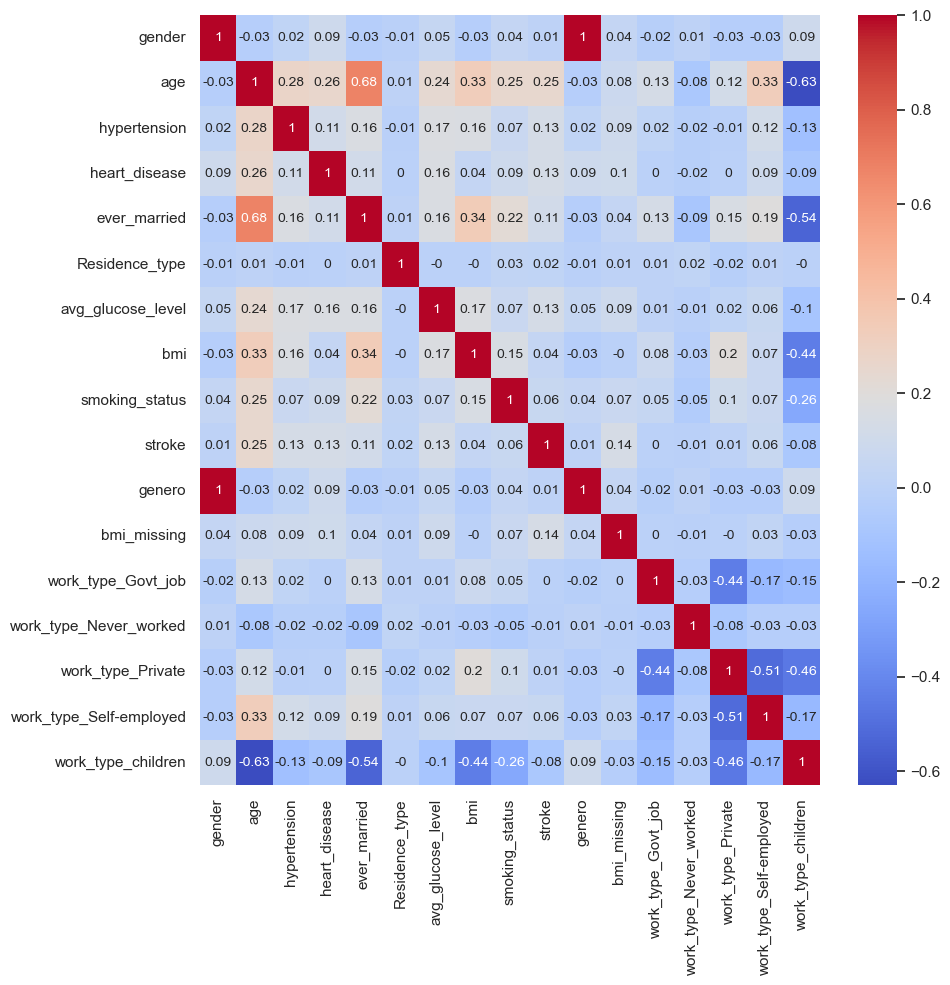

In [599]:
crear_heatmap_correlacion(df2)

### Interpretación General de la Matriz de Correlación

Se observa una correlación de **0.68** entre `age` y `ever_married`, lo cual indica que, a medida que aumenta la edad, también se incrementa la probabilidad de haber estado casado(a). Dado que nuestro objetivo es **predecir `stroke`**, y estas dos variables están fuertemente relacionadas, en los modelos posteriores podríamos optar por conservar solo una de ellas para evitar problemas de multicolinealidad. Además, un modelo más simple facilita su interpretación.

Se observa una correlación de **0.33** entre `bmi` (body mass index) y `age`, lo que indica que, a medida que aumenta la edad, tiende a incrementarse el índice de masa corporal. Dado que nuestro objetivo es predecir **stroke**, es importante evaluar si ambas variables aportan información complementaria o si su inclusión conjunta podría generar redundancia o problemas de multicolinealidad. En este contexto, y siguiendo el principio de la navaja de Occam, se recomienda analizar el aporte individual de cada variable y, si es necesario, optar por aquella que mejore la interpretabilidad y desempeño del modelo.


- Siempre es importante recordar que la correlación no implica causalidad.
